In [21]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD

In [8]:
path = 'mnist.npz'
with np.load(path, allow_pickle=True) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']

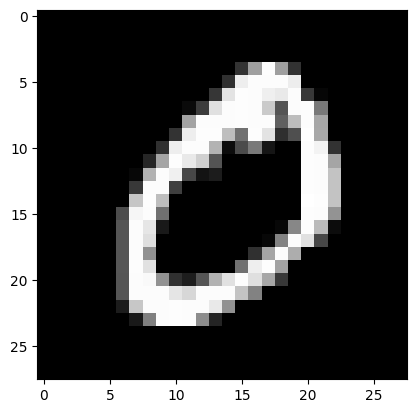

In [10]:
# x_train.shape
# x_train[0]
plt.imshow(x_train[1], cmap='gray')

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

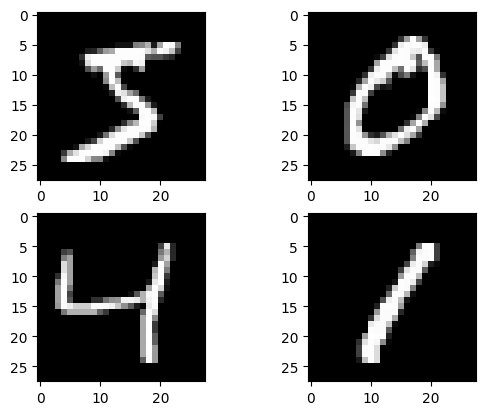

In [12]:
#Draw the previous 4 images in the x_train dataset
plt.subplot(2,2,1)
plt.imshow(x_train[0], cmap='gray')
plt.subplot(2,2,2)
plt.imshow(x_train[1], cmap='gray')
plt.subplot(2,2,3)
plt.imshow(x_train[2], cmap='gray')
plt.subplot(2,2,4)
plt.imshow(x_train[3], cmap='gray')

# Preprocessing

In [13]:
# Standardization
x_train = x_train.astype('float') / 255.0
x_test = x_test.astype('float') / 255.0

x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
# 將二維的 28*28 的資料拉直 變成 784  (reshape)
print(f'Before reshape {x_train.shape}')
x_train = x_train.reshape(60000,28*28)
print(f'After reshape {x_train.shape}')
x_test=x_test.reshape(x_test.shape[0],-1) # -1 請 python 幫你計算 I don't care
print(f'After reshape {x_test.shape}')

Before reshape (60000, 28, 28)
After reshape (60000, 784)
After reshape (10000, 784)


In [16]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [19]:
# x_train.shape
# y_train.shape

(60000, 784)

In [20]:
model = Sequential()

# first layer
model.add(Dense(256, input_dim=x_train.shape[1], activation='relu'))
# second layer
model.add(Dense(512, activation='relu'))
#output
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 337674 (1.29 MB)
Trainable params: 337674 (1.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
opt = SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

In [23]:
h = model.fit(x_train, y_train, epochs=25, batch_size=100)

Epoch 1/25
600/600 [==============================] - 1s 1ms/step - loss: 0.3997 - accuracy: 0.8861
Epoch 2/25
600/600 [==============================] - 1s 1ms/step - loss: 0.1840 - accuracy: 0.9462
Epoch 3/25
600/600 [==============================] - 1s 2ms/step - loss: 0.1318 - accuracy: 0.9611
Epoch 4/25
600/600 [==============================] - 1s 2ms/step - loss: 0.1030 - accuracy: 0.9700
Epoch 5/25
600/600 [==============================] - 1s 2ms/step - loss: 0.0831 - accuracy: 0.9757
Epoch 6/25
600/600 [==============================] - 1s 2ms/step - loss: 0.0694 - accuracy: 0.9803
Epoch 7/25
600/600 [==============================] - 1s 2ms/step - loss: 0.0585 - accuracy: 0.9831
Epoch 8/25
600/600 [==============================] - 1s 1ms/step - loss: 0.0498 - accuracy: 0.9859
Epoch 9/25
600/600 [==============================] - 1s 2ms/step - loss: 0.0429 - accuracy: 0.9882
Epoch 10/25
600/600 [==============================] - 1s 2ms/step - loss: 0.0368 - accuracy: 0.9902

<Axes: >

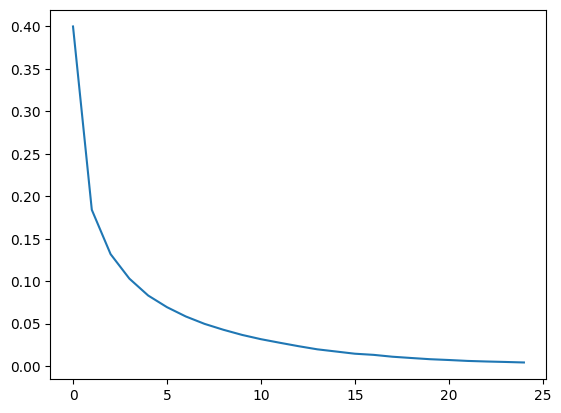

In [24]:
sns.lineplot(x=range(25), y=h.history['loss'])

<Axes: >

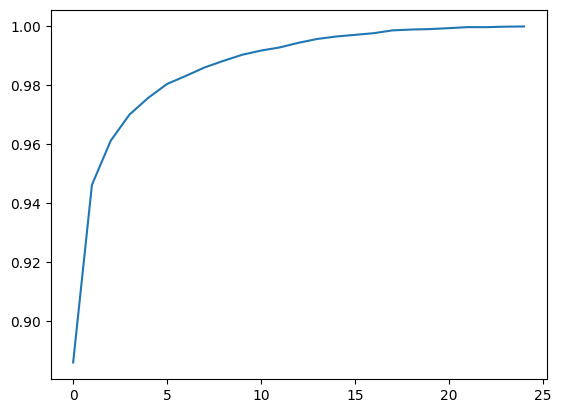

In [25]:
sns.lineplot(x=range(25), y=h.history['accuracy'])

In [26]:
# evaluation our performance
eloss, eacc = model.evaluate(x_test,y_test)
print(f'Loss:{eloss}')
print(f'Accuracy:{eacc}')

313/313 [==============================] - 0s 524us/step - loss: 0.0657 - accuracy: 0.9805
Loss:0.06567549705505371
Accuracy:0.9804999828338623


In [28]:
# Make a prediction
y_pred = model.predict(x_test)
y_pred[0]

y_pred_class = np.argmax(y_pred,axis=1)
y_pred_class[0]

313/313 [==============================] - 0s 443us/step


7

In [29]:
y_test_class = np.argmax(y_test, axis=1)
y_test_class[0]

7